# Prodigy InfoTech Internship: Task 3

# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset deom the UCI Machine Learning Repository.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
sns.set(style="whitegrid")

In [3]:
url = r"E:\data science internship task 3\data\bank-additional.csv"
data = pd.read_csv(url, sep=';')

In [4]:
print("First 5 rows of the dataset:")
display(data.head())


First 5 rows of the dataset:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   41

In [6]:
print("\nDataset Summary:")
display(data.describe())



Dataset Summary:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
print("\nMissing Values in the Dataset:")
missing_values = data.isnull().sum()
display(missing_values[missing_values > 0])


Missing Values in the Dataset:


Series([], dtype: int64)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\2859271161.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


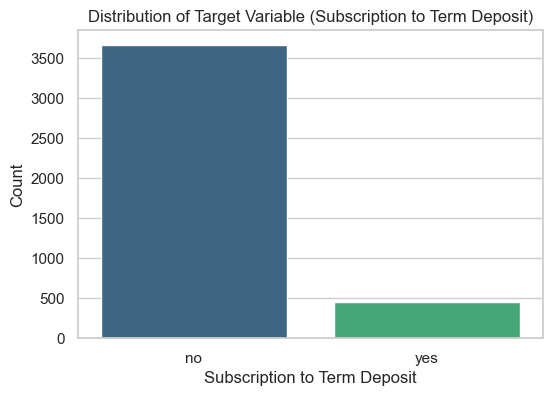

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Distribution of Target Variable (Subscription to Term Deposit)')
plt.xlabel('Subscription to Term Deposit')
plt.ylabel('Count')
plt.show()

In [9]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [10]:
X = data_encoded.drop('y_yes', axis=1)
y = data_encoded['y_yes']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=50)


In [13]:
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=42)

In [14]:
y_pred = clf.predict(X_test)


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy of the Decision Tree Model: {accuracy:.2f}')


Accuracy of the Decision Tree Model: 0.90


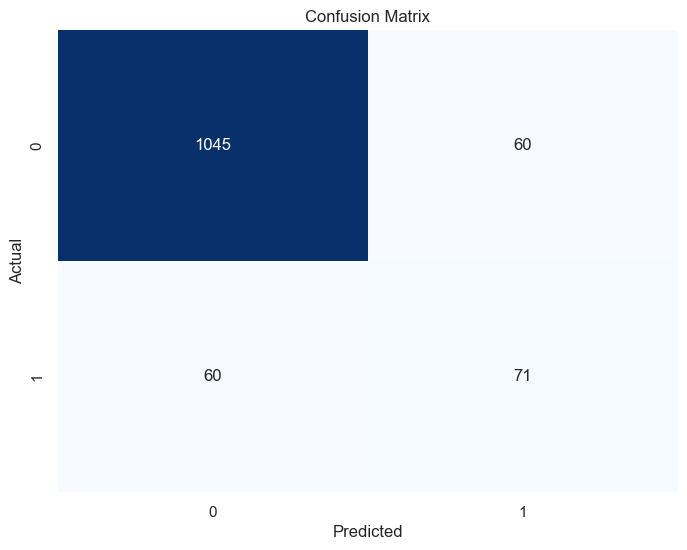

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.95      0.95      1105
        True       0.54      0.54      0.54       131

    accuracy                           0.90      1236
   macro avg       0.74      0.74      0.74      1236
weighted avg       0.90      0.90      0.90      1236



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2484\217892805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')


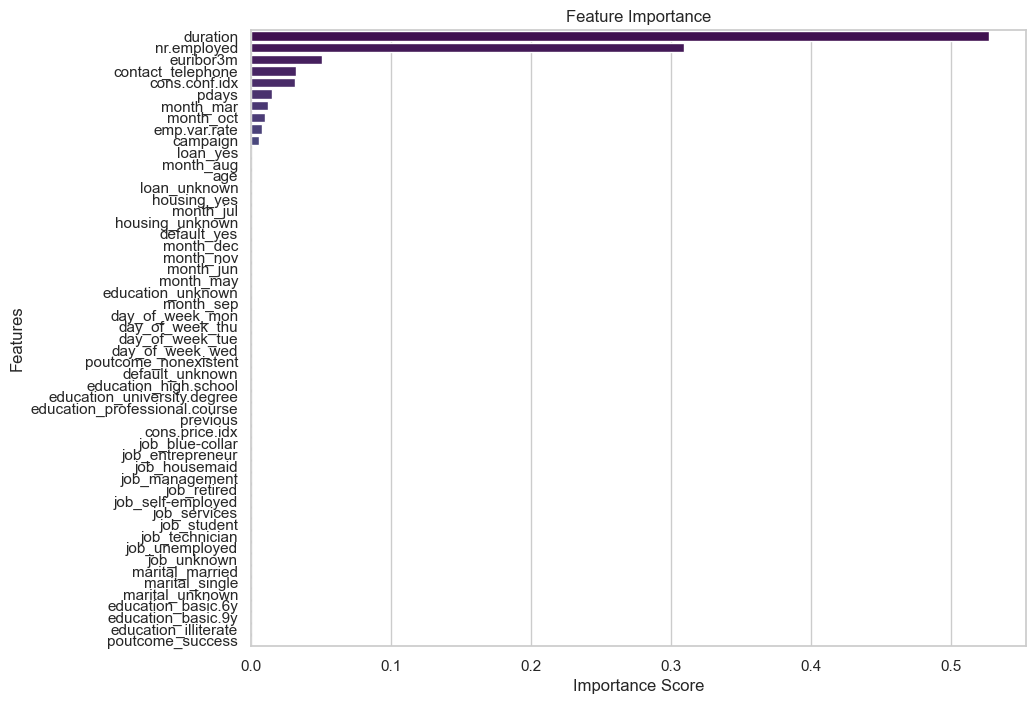

In [18]:
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


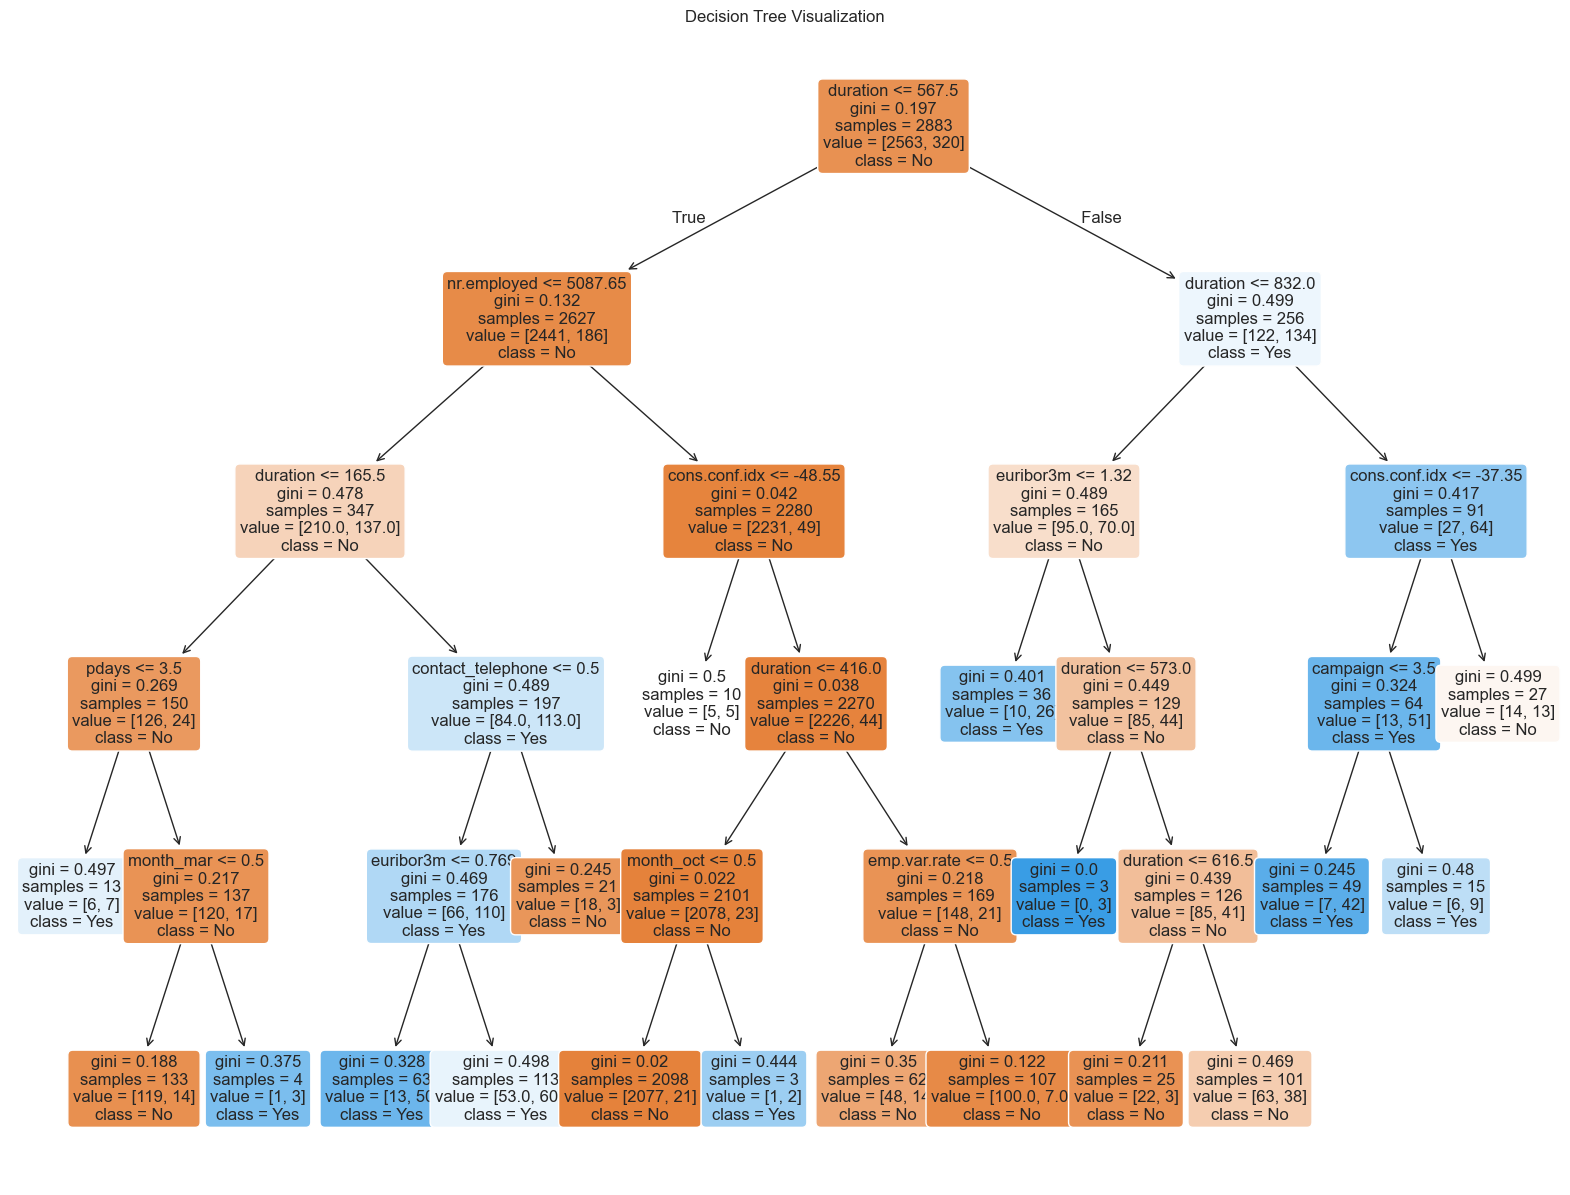

In [19]:
plt.figure(figsize=(20, 15))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True, fontsize=12)
plt.title('Decision Tree Visualization')
plt.show()


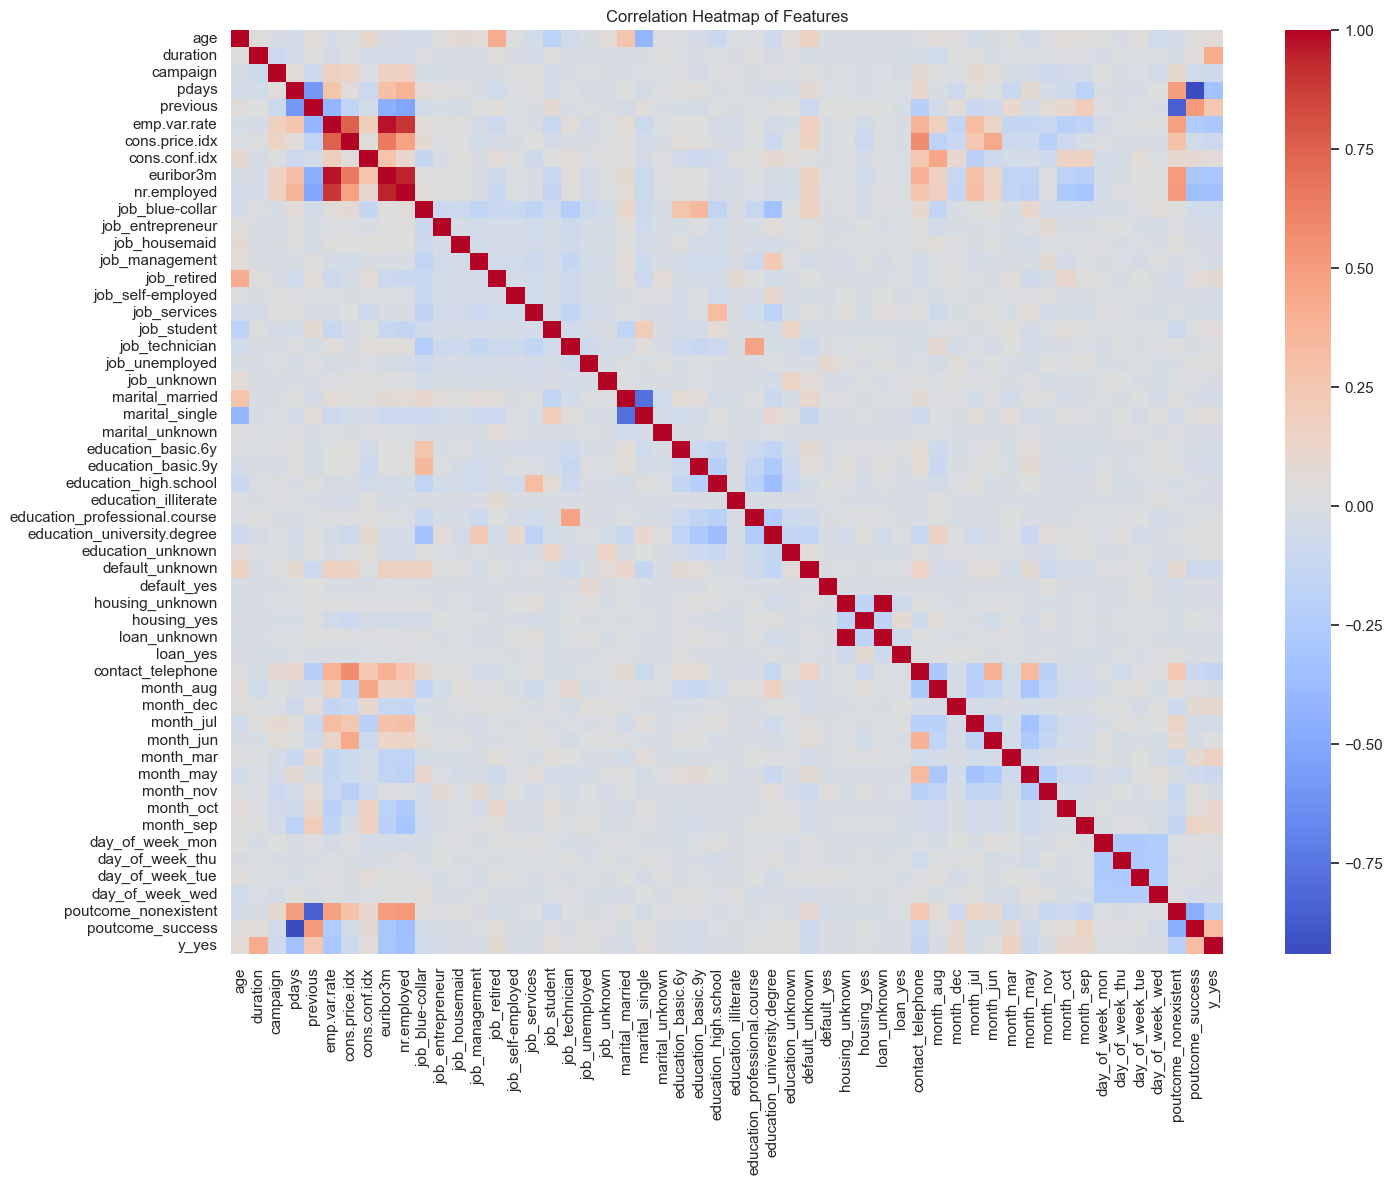

In [20]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_encoded.corr(), cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

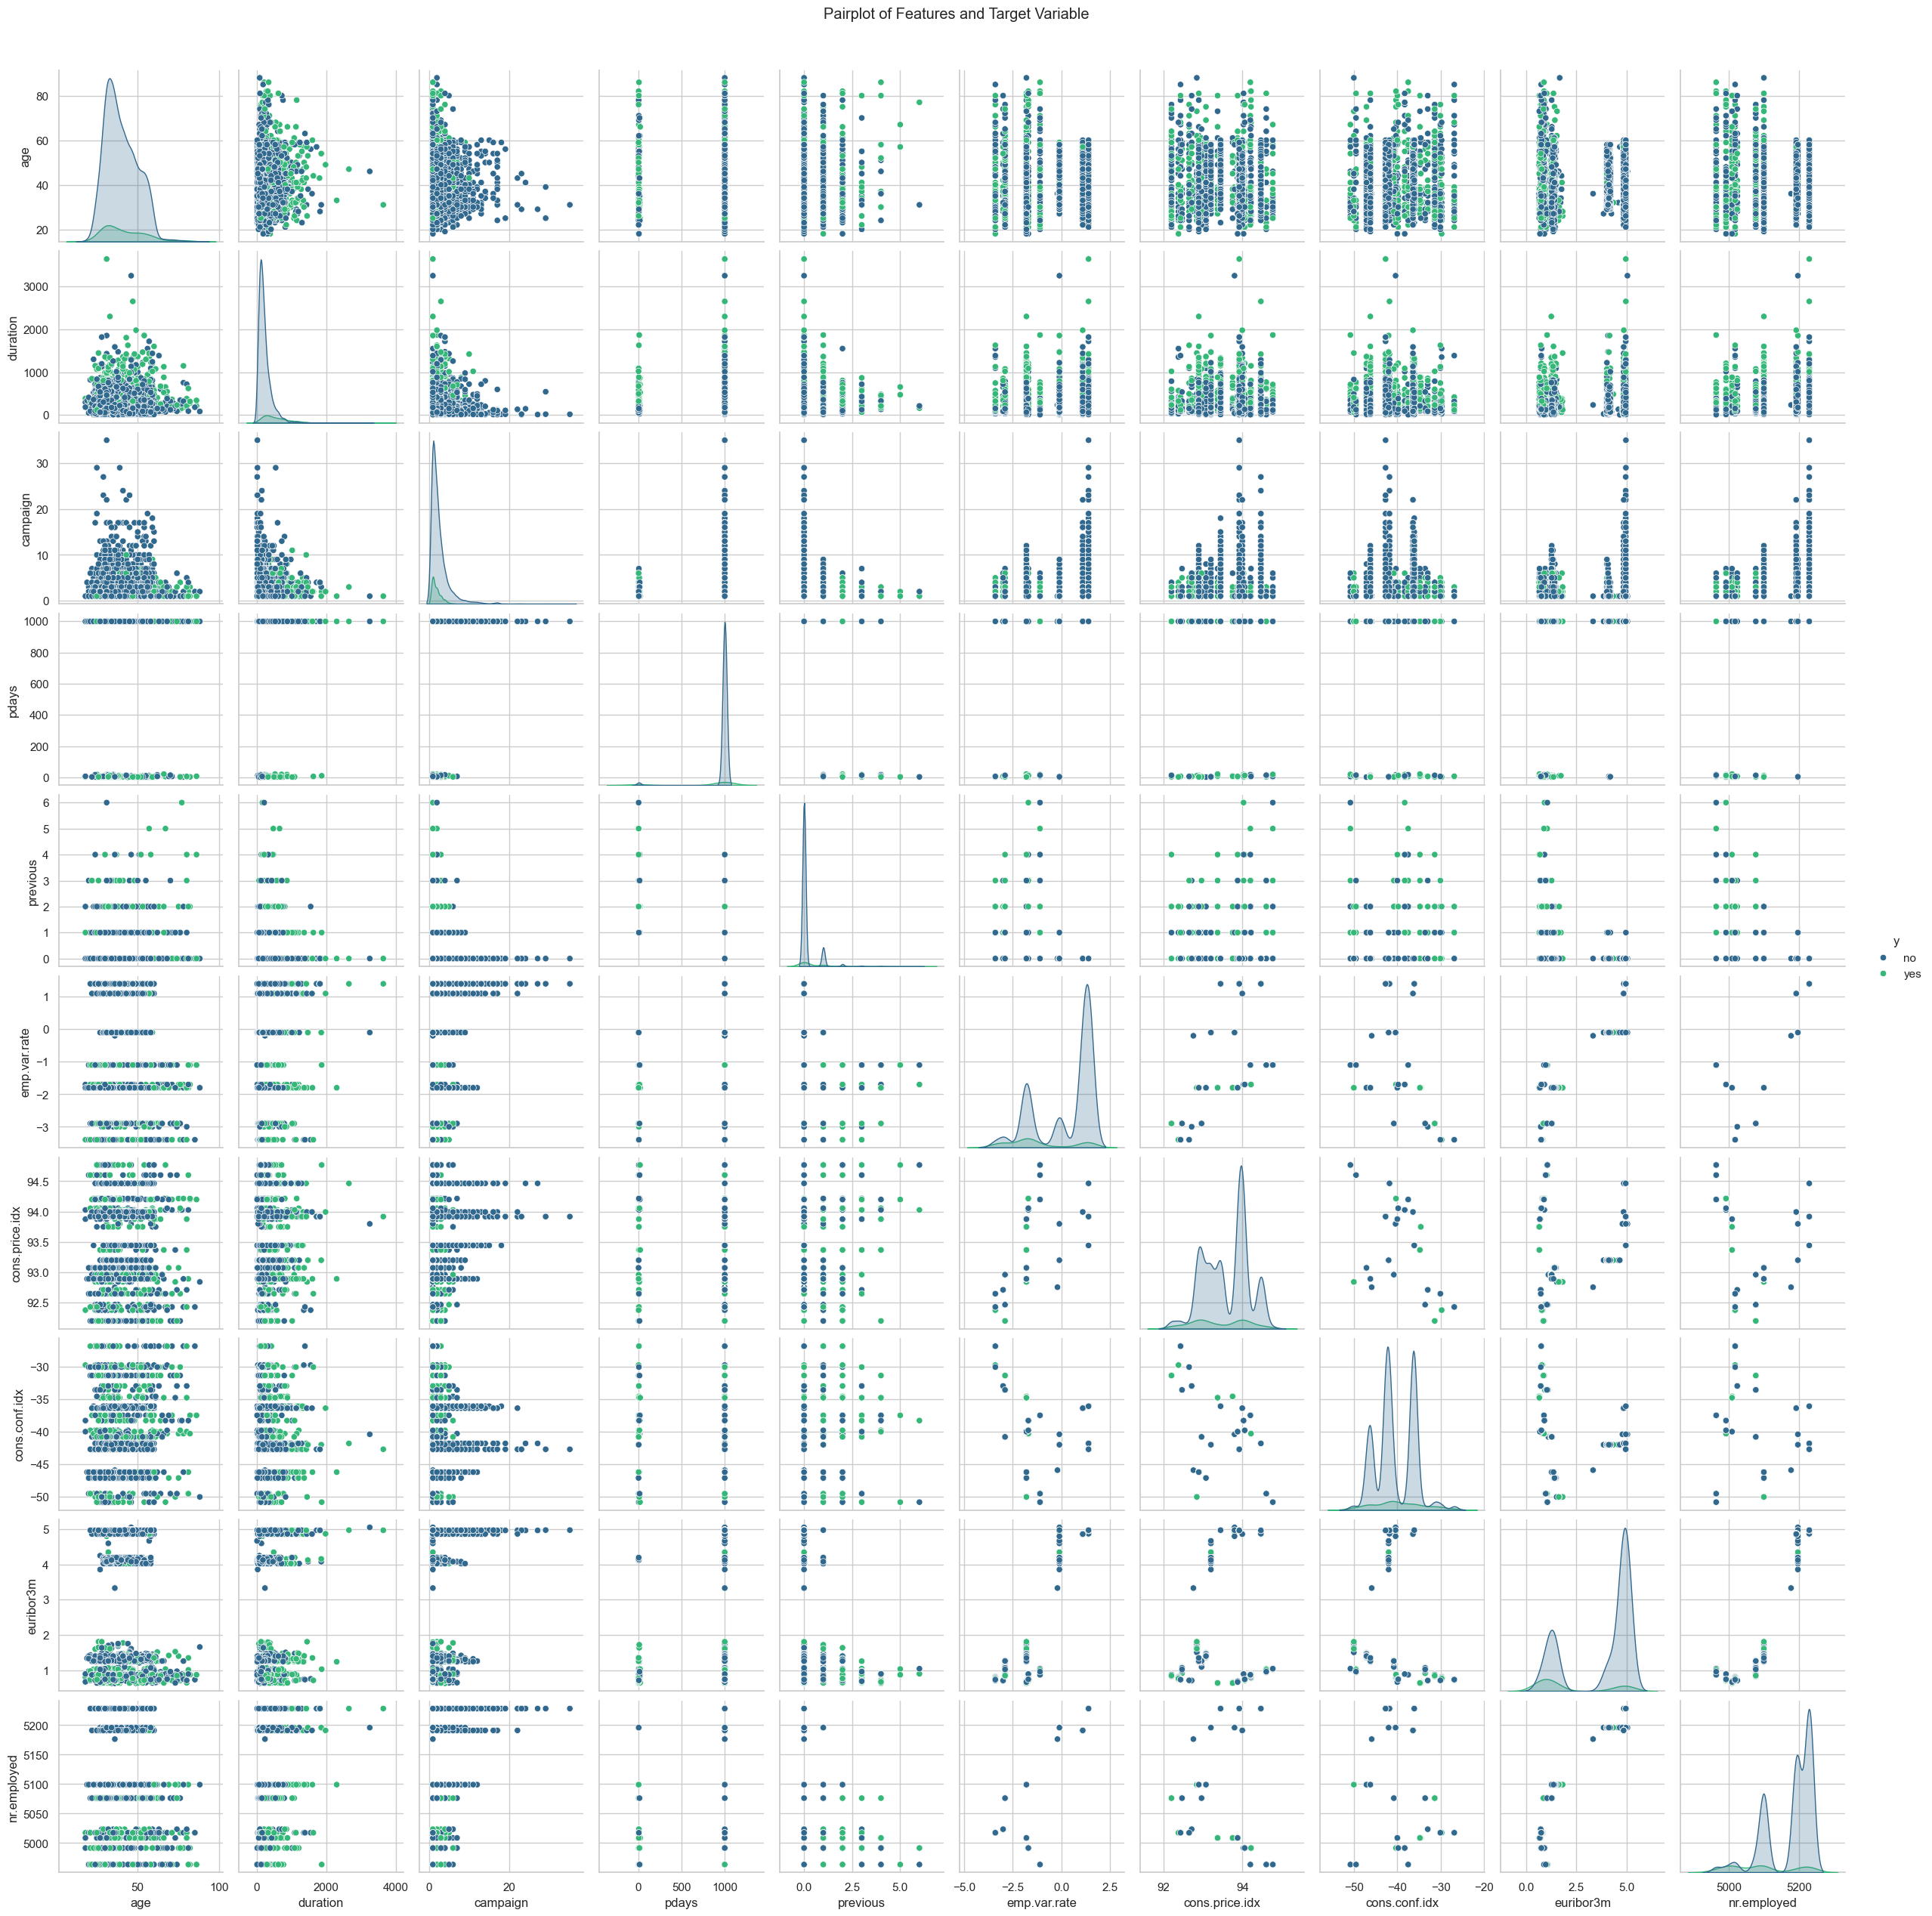

In [21]:
sns.pairplot(data, hue='y', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Features and Target Variable', y=1.02)
plt.show()